In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [62]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('https://raw.githubusercontent.com/lucasginevro/data_science_assignment/main/U.S._Chronic_Disease_Indicators.csv')

In [64]:
df.head(100)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,TopicID,QuestionID,ResponseID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2019,2019,GA,Georgia,BRFSS,Disability,Adults with any disability,NaN,%,Crude Prevalence,...,DIS,DIS01,NaN,CRDPREV,AGE,AGE65P,NaN,NaN,NaN,NaN
1,2019,2019,GU,Guam,BRFSS,Arthritis,Arthritis among adults,NaN,%,Crude Prevalence,...,ART,ART01,NaN,CRDPREV,SEX,SEXF,NaN,NaN,NaN,NaN
2,2019,2019,GU,Guam,BRFSS,Immunization,Influenza vaccination among adults,NaN,%,Crude Prevalence,...,IMM,IMM01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
3,2019,2019,ME,Maine,BRFSS,Diabetes,Diabetes among adults,NaN,%,Crude Prevalence,...,DIA,DIA01,NaN,CRDPREV,SEX,SEXM,NaN,NaN,NaN,NaN
4,2019,2019,NV,Nevada,NVSS,Health Status,Life expectancy at birth,NaN,Years,Number,...,HEA,HEA06,NaN,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015,2019,DE,Delaware,US Cancer DVT,Cancer,Invasive cancer (all sites combined) mortality...,NaN,Number,Number,...,CAN,CAN08,NaN,NMBR,RACE,WHT,NaN,NaN,NaN,NaN
96,2016,2020,HI,Hawaii,US Cancer DVT,Cancer,Colon and rectum (colorectal) cancer mortality...,NaN,"per 100,000",Crude Rate,...,CAN,CAN01,NaN,CRDRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
97,2016,2020,NE,Nebraska,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",NaN,"per 100,000",Crude Rate,...,CAN,CAN02,NaN,CRDRATE,OVERALL,OVR,NaN,NaN,NaN,NaN
98,2015,2019,GA,Georgia,US Cancer DVT,Cancer,"Breast cancer mortality among all females, und...",NaN,Number,Number,...,CAN,CAN02,NaN,NMBR,RACE,HIS,NaN,NaN,NaN,NaN


In [65]:
df.shape

(311745, 34)

In [66]:
# Showing all Columns and its respectively Datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   Response                   0 non-null       float64
 8   DataValueUnit              311745 non-null  object 
 9   DataValueType              311745 non-null  object 
 10  DataValue                  210684 non-null  float64
 11  DataValueAlt               210684 non-null  float64
 12  DataValueFootnoteSymbol    102758 non-null  object 
 13  DataValueFootnote          10

In [67]:
# Dropping all columns where all values are Null
df = df.dropna(axis=1, how='all')

# Check the resulting DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311745 entries, 0 to 311744
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   YearStart                  311745 non-null  int64  
 1   YearEnd                    311745 non-null  int64  
 2   LocationAbbr               311745 non-null  object 
 3   LocationDesc               311745 non-null  object 
 4   DataSource                 311745 non-null  object 
 5   Topic                      311745 non-null  object 
 6   Question                   311745 non-null  object 
 7   DataValueUnit              311745 non-null  object 
 8   DataValueType              311745 non-null  object 
 9   DataValue                  210684 non-null  float64
 10  DataValueAlt               210684 non-null  float64
 11  DataValueFootnoteSymbol    102758 non-null  object 
 12  DataValueFootnote          102758 non-null  object 
 13  LowConfidenceLimit         19

In [68]:
# Checking for more nulls
df.isnull().sum()

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                     0
DataValueType                     0
DataValue                    101061
DataValueAlt                 101061
DataValueFootnoteSymbol      208987
DataValueFootnote            208987
LowConfidenceLimit           121372
HighConfidenceLimit          121367
StratificationCategory1           0
Stratification1                   0
Geolocation                    5809
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64

In [69]:
# Filling null values with mean
df['DataValue'].fillna(df['DataValue'].mean(), inplace=True)
df['DataValueAlt'].fillna(df['DataValueAlt'].mean(), inplace=True)
df['LowConfidenceLimit'].fillna(df['LowConfidenceLimit'].mean(), inplace=True)
df['HighConfidenceLimit'].fillna(df['HighConfidenceLimit'].mean(), inplace=True)

In [70]:
# Filling null values for Object Columns with the mode
object_columns = ['DataValueFootnoteSymbol', 'DataValueFootnote', 'Geolocation']
for col in object_columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)


In [71]:
df.describe()

,YearStart,YearEnd,DataValue,DataValueAlt,LowConfidenceLimit,HighConfidenceLimit,LocationID
count,311745.000000,311745.000000,3.117450e+05,3.117450e+05,311745.000000,311745.000000,311745.000000
mean,2020.028328,2020.302430,6.897924e+02,7.308139e+02,36.866274,46.092071,31.213934
std,1.535006,1.075266,1.327350e+04,1.502960e+04,50.646636,54.518769,17.803762
min,2015.000000,2019.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000
25%,2019.000000,2019.000000,1.846000e+01,1.846000e+01,15.200000,22.800000,17.000000
50%,2020.000000,2020.000000,5.600000e+01,5.600000e+01,36.866274,46.092071,31.000000
75%,2021.000000,2021.000000,6.897924e+02,7.308139e+02,36.866274,46.092071,45.000000
max,2022.000000,2022.000000,2.925456e+06,2.925456e+06,1427.000000,1485.900000,78.000000


In [72]:
df.isnull().sum()

YearStart                    0
YearEnd                      0
LocationAbbr                 0
LocationDesc                 0
DataSource                   0
Topic                        0
Question                     0
DataValueUnit                0
DataValueType                0
DataValue                    0
DataValueAlt                 0
DataValueFootnoteSymbol      0
DataValueFootnote            0
LowConfidenceLimit           0
HighConfidenceLimit          0
StratificationCategory1      0
Stratification1              0
Geolocation                  0
LocationID                   0
TopicID                      0
QuestionID                   0
DataValueTypeID              0
StratificationCategoryID1    0
StratificationID1            0
dtype: int64

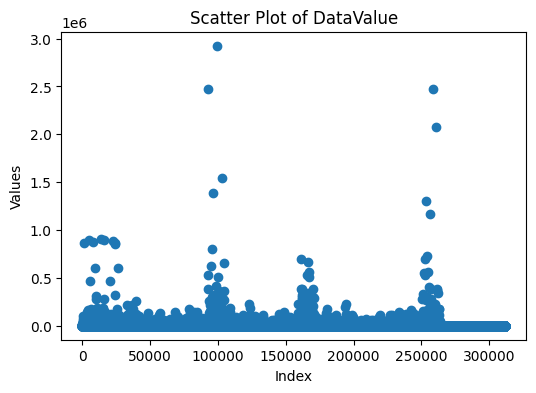

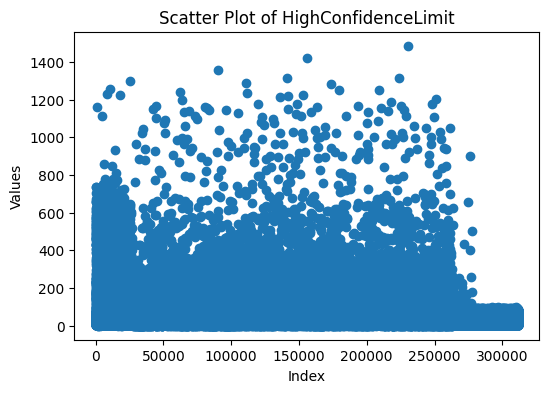

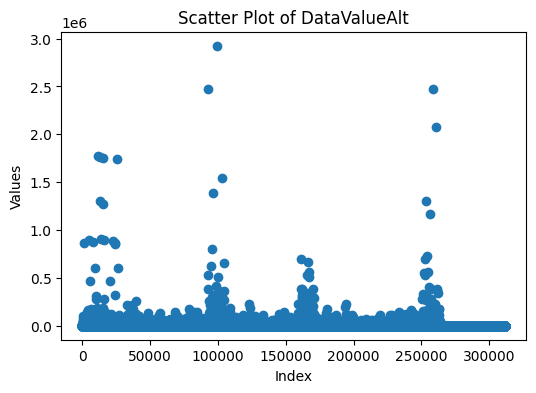

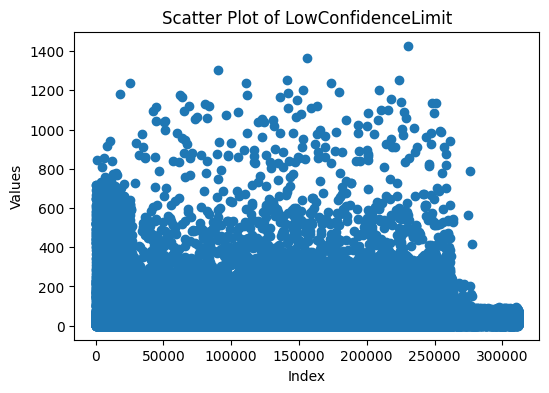

In [73]:
# Checking for Outliners
features = ['DataValue', 'HighConfidenceLimit', 'DataValueAlt', 'LowConfidenceLimit']

# Create a scatter plot for each column
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(range(len(df)), df[feature])
    plt.title(f'Scatter Plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.show()
    

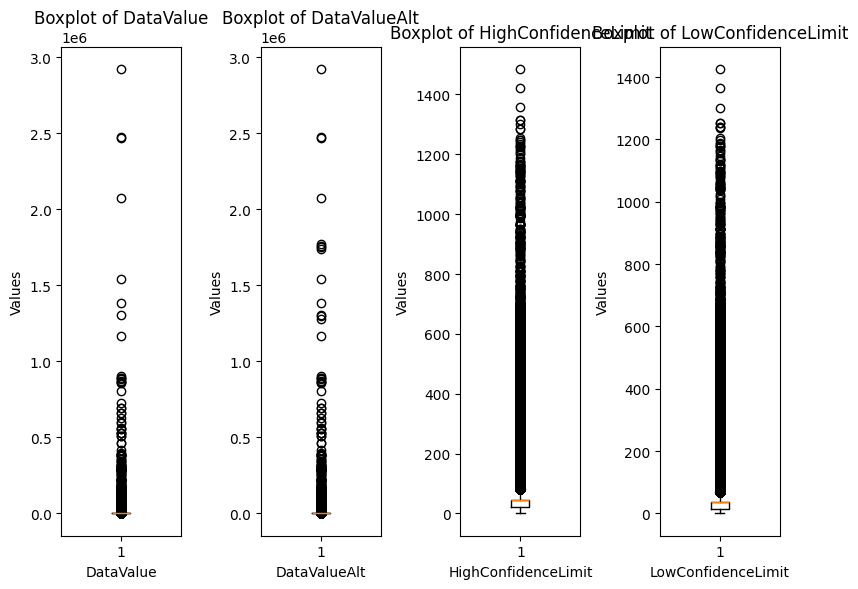

In [74]:
columns = ['DataValue', 'DataValueAlt', 'HighConfidenceLimit', 'LowConfidenceLimit']
fig, axs = plt.subplots(1, len(columns), figsize=(8, 6))
for i, column in enumerate(columns):
    axs[i].boxplot(df[column])
    axs[i].set_title(f'Boxplot of {column}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Values')
plt.tight_layout()
plt.show()


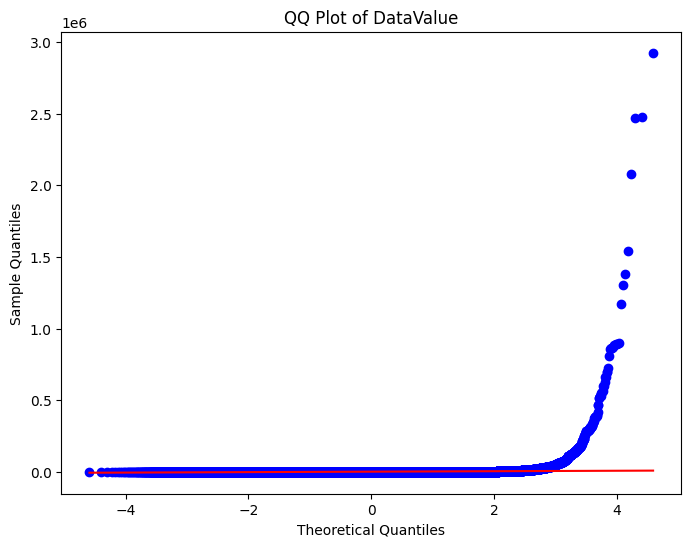

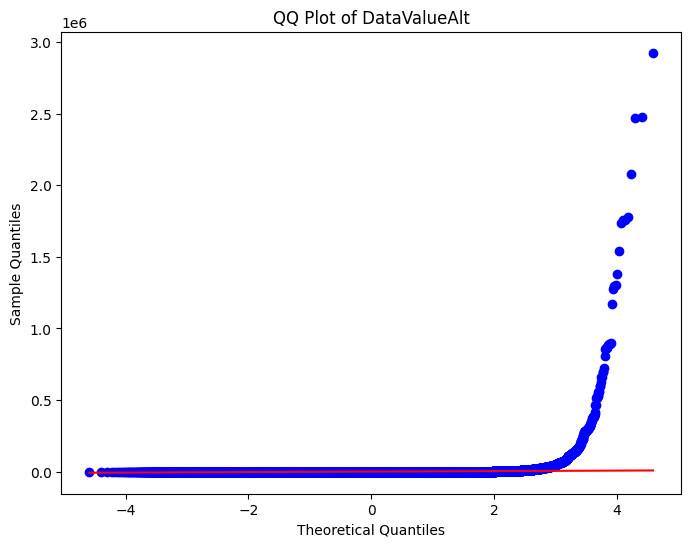

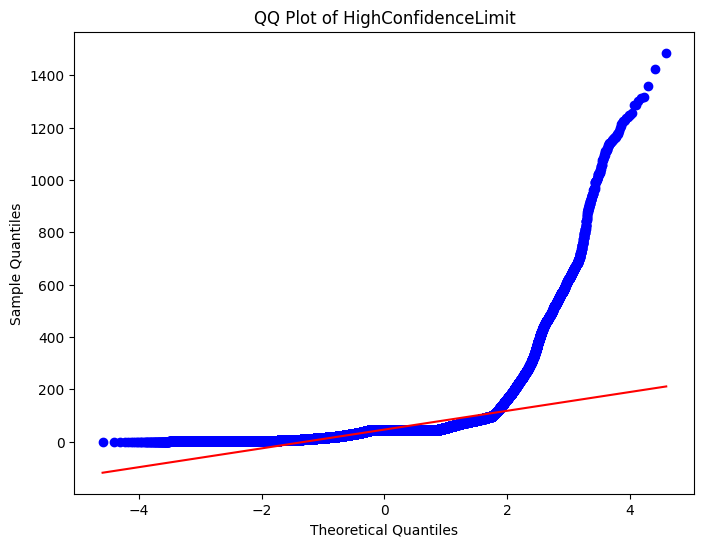

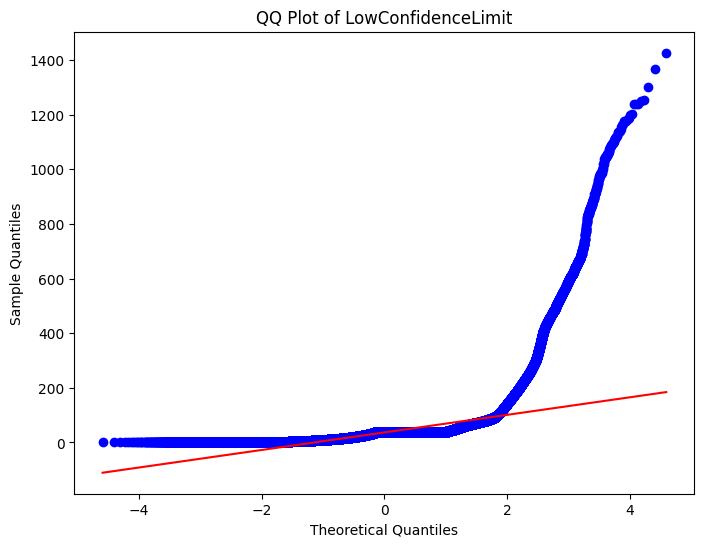

In [75]:
import scipy.stats as stats

for column in columns:
    plt.figure(figsize=(8, 6))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'QQ Plot of {column}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.show()

All what is being said in the graphs above is that the data is not normally distributed while also have a lot of outliners. This could be because it is a medical related data. So it will change what kind of machine learning model we decide to use.

## Distribution of Chronic Diseases

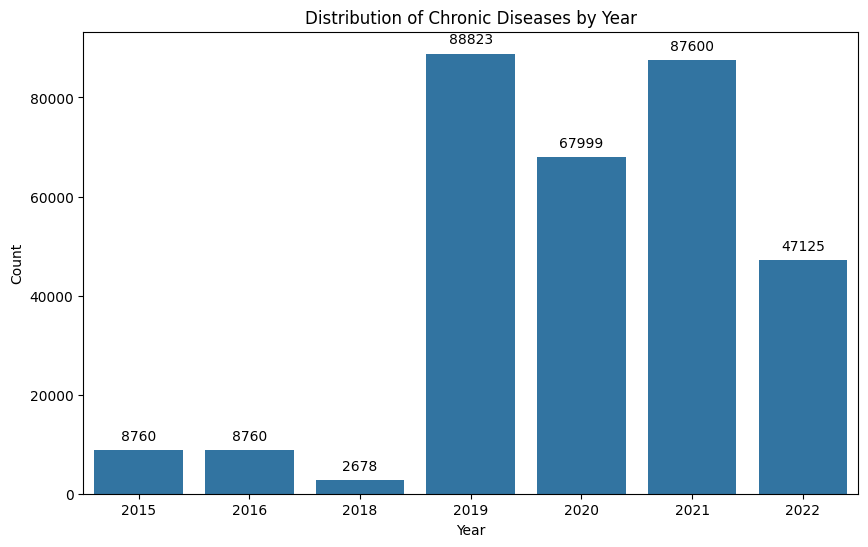

In [76]:
# Explore distribution of chronic diseases by year
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='YearStart')
plt.title('Distribution of Chronic Diseases by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

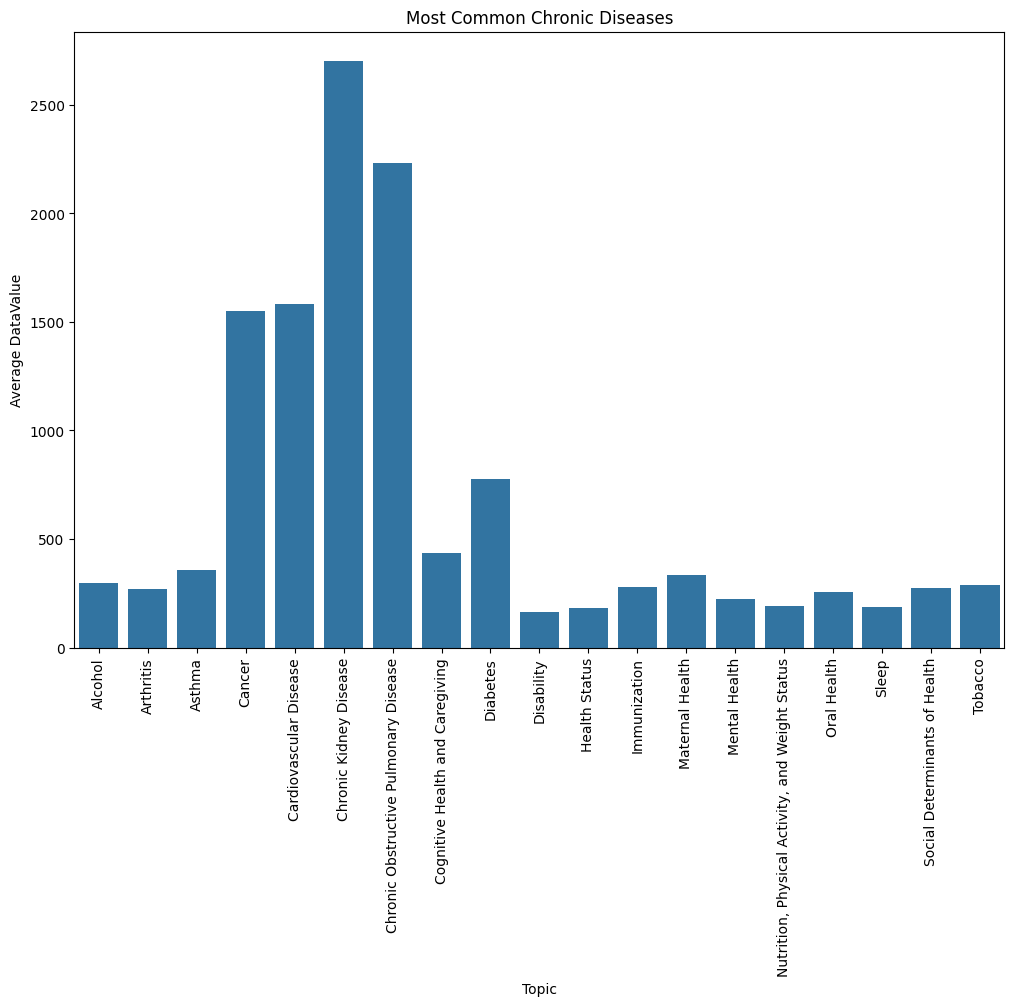

In [77]:
# Calculate the mean of DataValue for each Topic
mean_data_value = df.groupby('Topic')['DataValue'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=mean_data_value, x='Topic', y='DataValue')
plt.title('Most Common Chronic Diseases')
plt.xlabel('Topic')
plt.ylabel('Average DataValue')
plt.xticks(rotation=90)
plt.show()

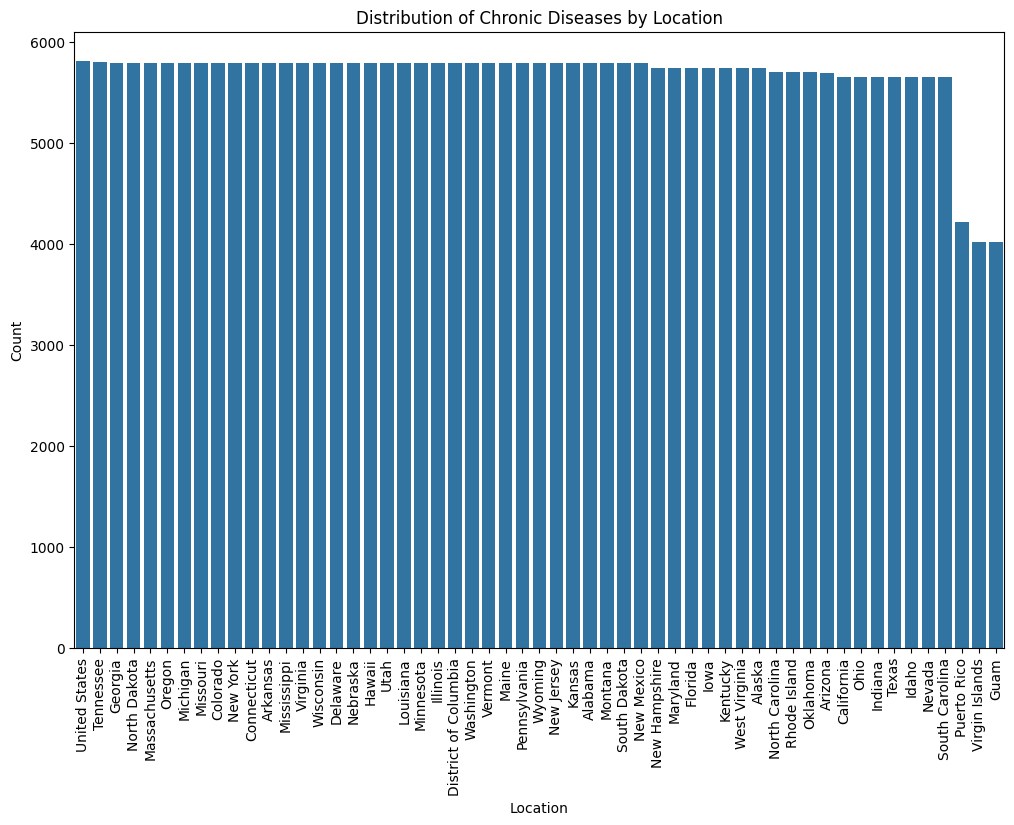

In [78]:
# Distribution of Chronic Diseases by Location
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='LocationDesc', order=df['LocationDesc'].value_counts().index)
plt.title('Distribution of Chronic Diseases by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of StratificationCategory1')

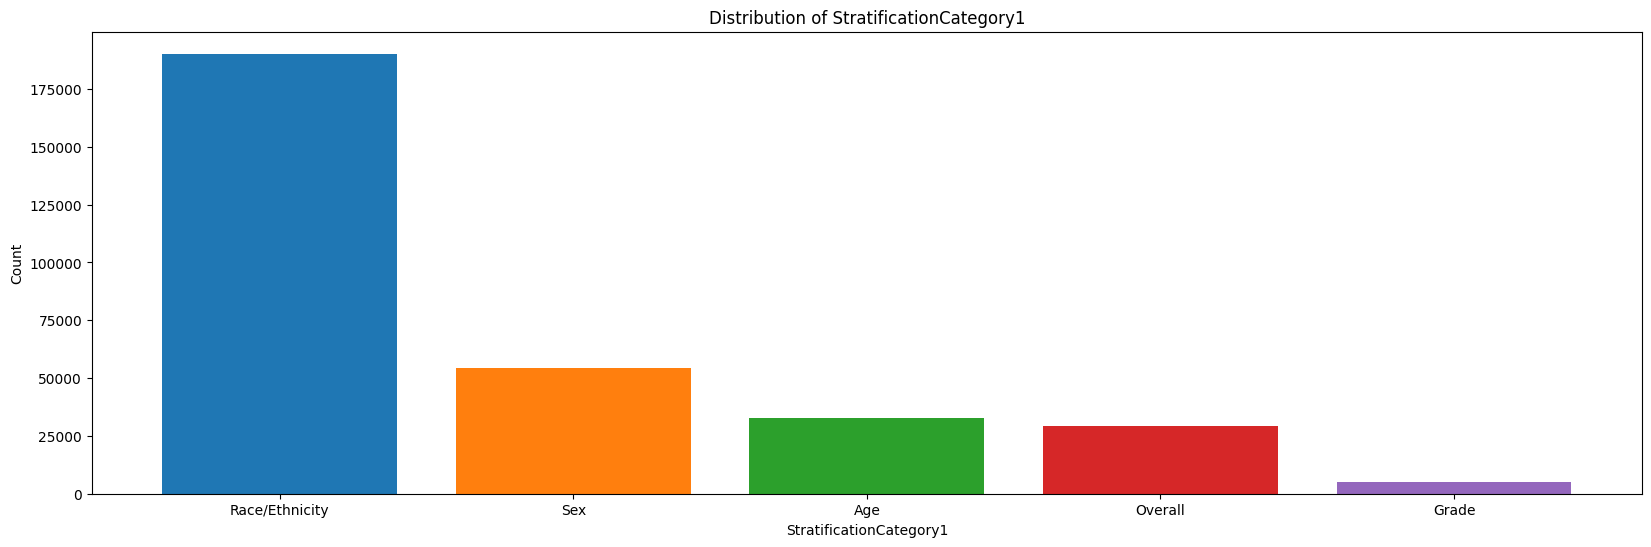

In [79]:
# Visualization of Distribution of StratificationCategory1
StratificationCategory1_counts = df['StratificationCategory1'].value_counts()
palette = sns.color_palette("tab10", len(StratificationCategory1_counts))
plt.figure(figsize=(20,6))
plt.bar(StratificationCategory1_counts.index, StratificationCategory1_counts.values, color=palette)
plt.xlabel('StratificationCategory1')
plt.ylabel('Count')
plt.title('Distribution of StratificationCategory1')

The graph above shows that the Most entered Straification (category) is Race/Ethnicity in our dataset folowed by sex and so forth.

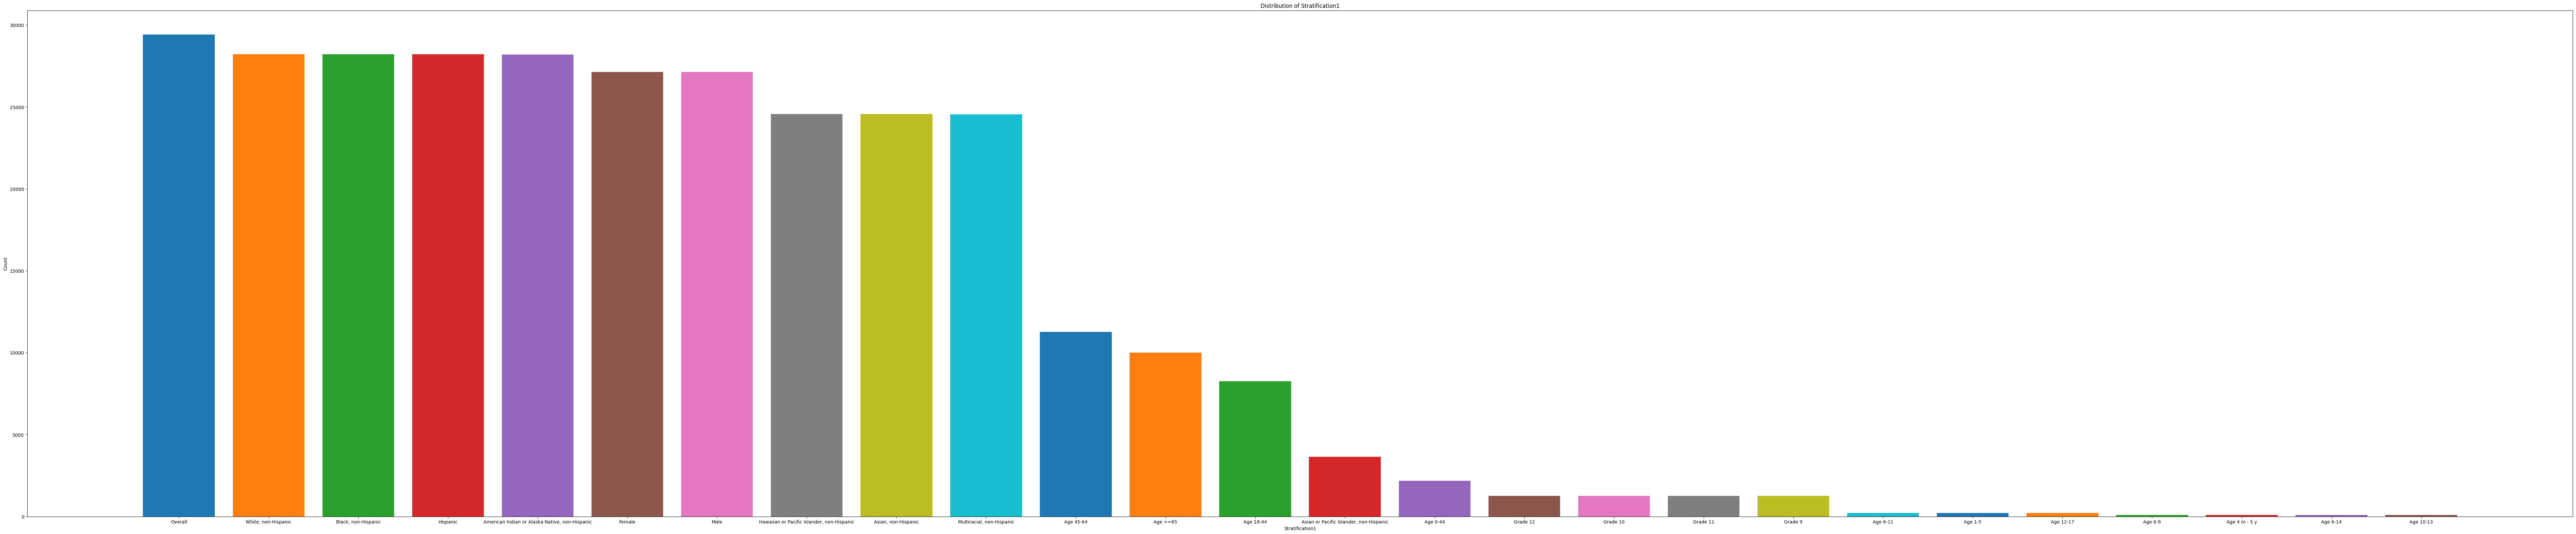

In [80]:
# Visualization of Distribution of Stratification1
Stratification1_counts = df['Stratification1'].value_counts()
palette = sns.color_palette("tab10", len(Stratification1_counts))
plt.figure(figsize=(100,20))
plt.bar(Stratification1_counts.index, Stratification1_counts.values, color=palette)
plt.xlabel('Stratification1')
plt.ylabel('Count')
plt.title('Distribution of Stratification1')

plt.show()

Since Race/Ethnicity was the largest category this show what Race was most common in the dataset. White people was First then Black people

NOTE: People age were never mentioned in the dataset so we cannot show a graph of that.

## Most common Topics

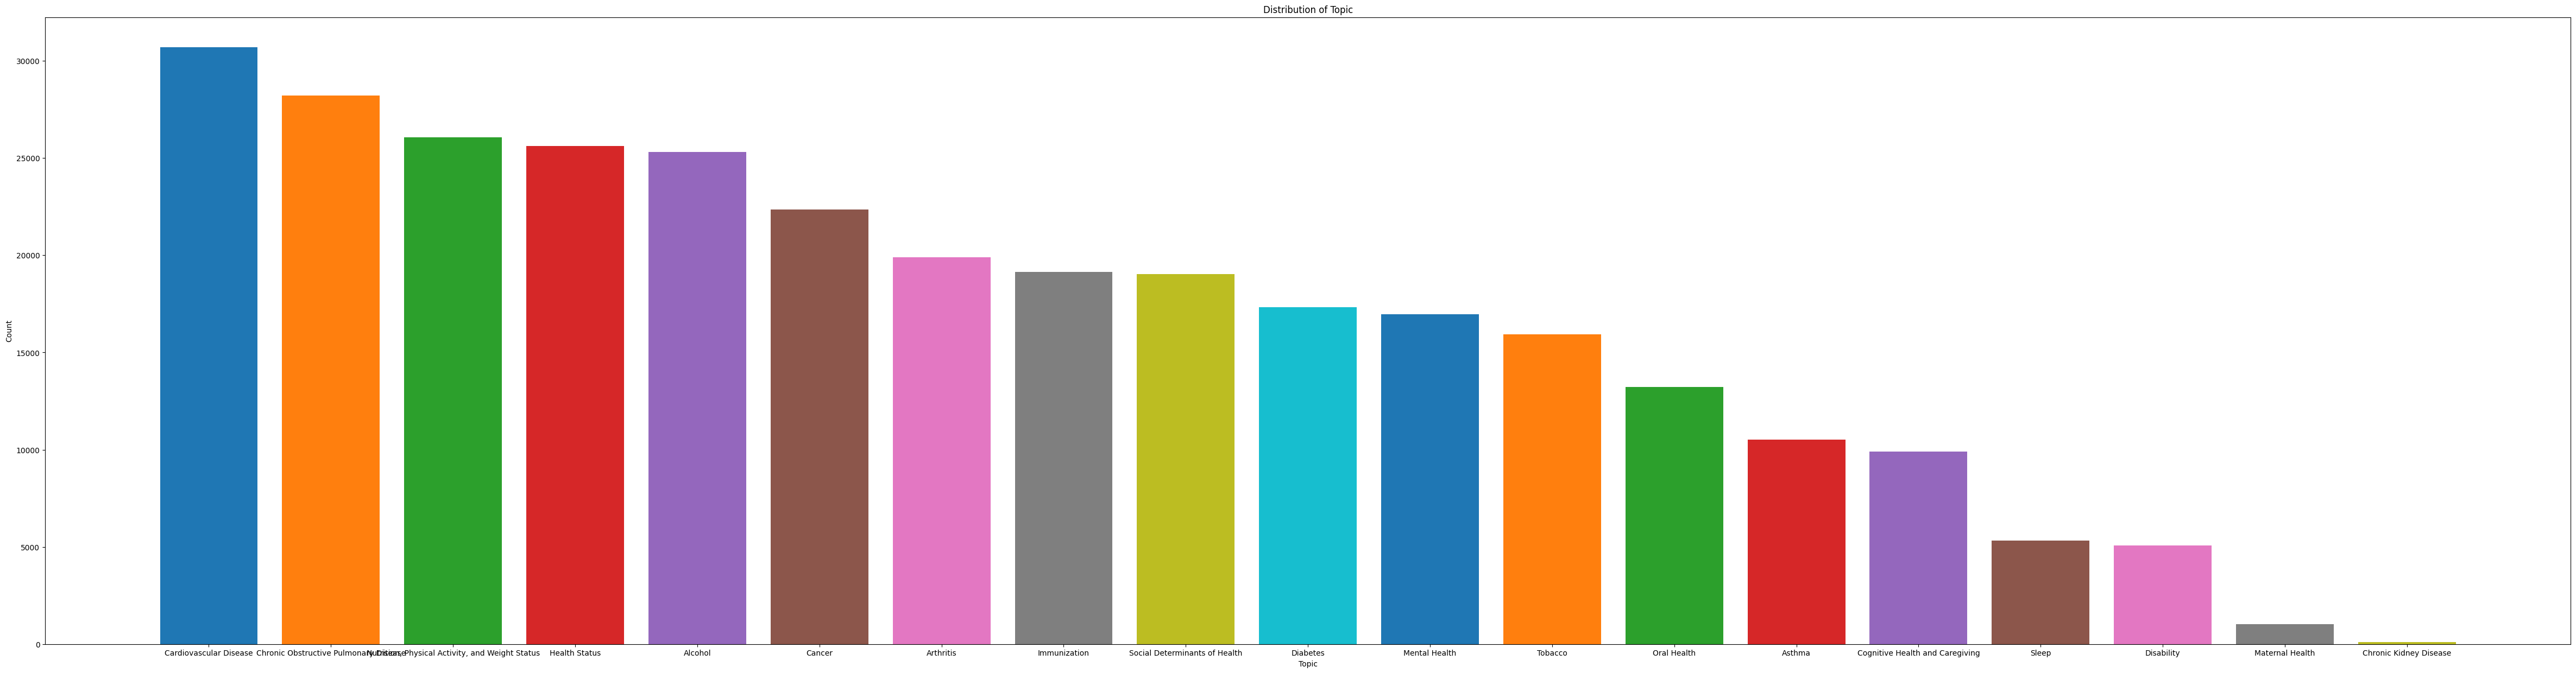

In [81]:
# Visualization of Distribution of Topic
Topic_counts = df['Topic'].value_counts()
palette = sns.color_palette("tab10", len(Topic_counts))
plt.figure(figsize=(60,15))
plt.bar(Topic_counts.index, Topic_counts.values, color=palette)
plt.xlabel('Topic')
plt.ylabel('Count')
plt.title('Distribution of Topic')

plt.show()

Cardiovascular Disease is the most dominant topic in the dataset.

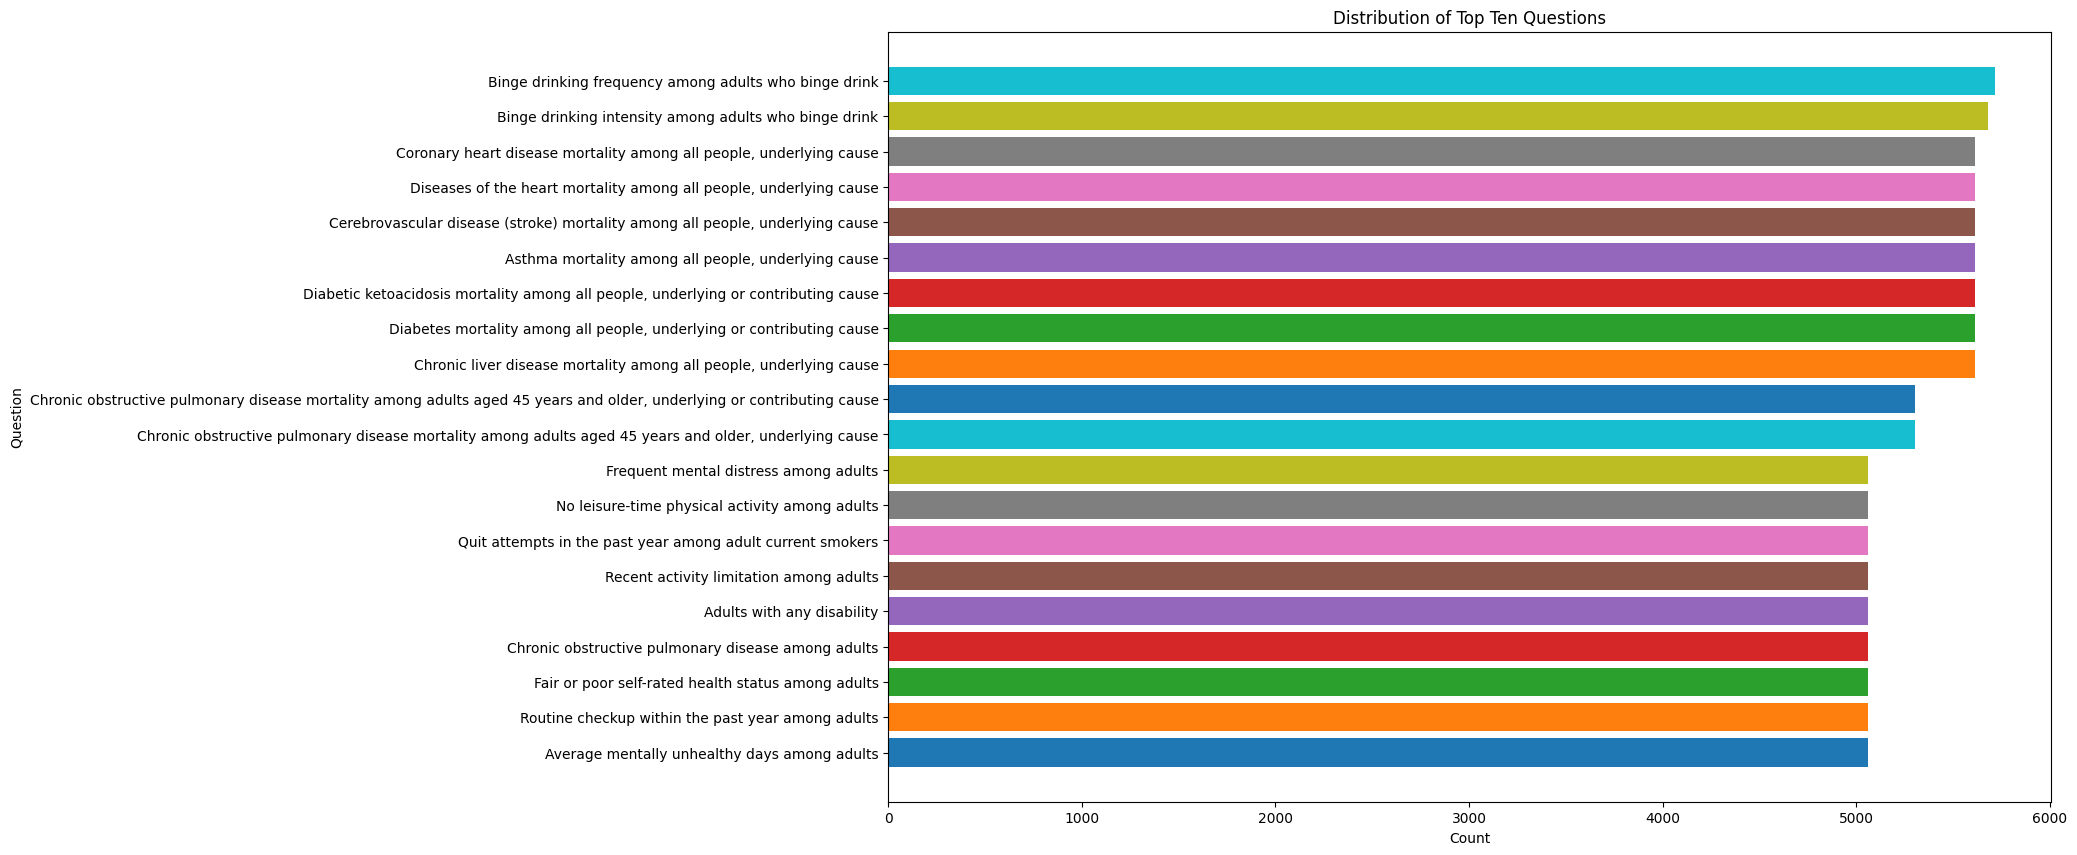

In [82]:
# Visualization of Distribution of Question
Question_counts = df['Question'].value_counts()
top_ten_questions = Question_counts.head(20)
# Sort the top 20 questions by count
top_ten_questions = top_ten_questions.sort_values(ascending=True)
palette = sns.color_palette("tab10", len(top_ten_questions))
plt.figure(figsize=(15, 10))
plt.barh(top_ten_questions.index, top_ten_questions.values, color=palette)
plt.xlabel('Count')
plt.ylabel('Question')
plt.title('Distribution of Top Ten Questions')
plt.show()

# Correlation Map

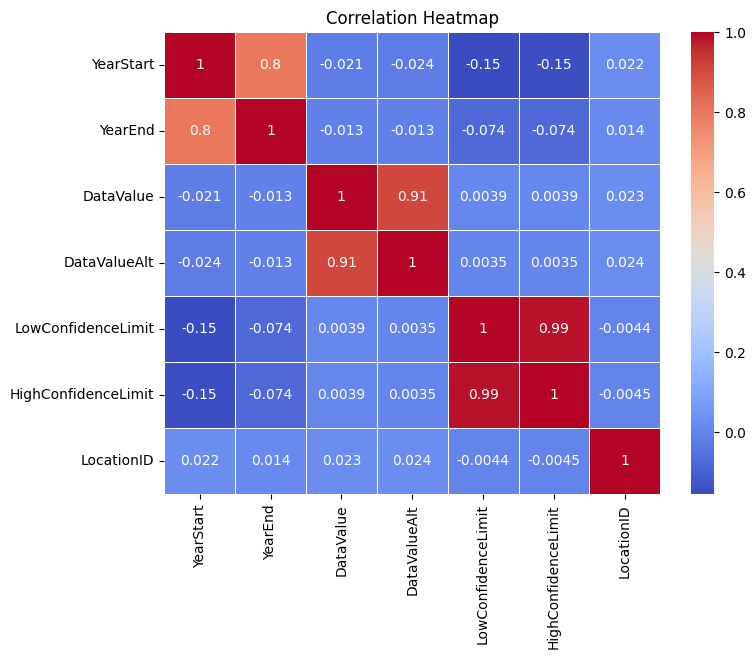

In [83]:
# Correlation Heatmap
# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

This shows that we should drop DataValueAlt from the table when we begin feature engineering, due to its high correlation with DataValue. LowConfidenceLimit and HighConfidenceLimit also has a high Correlation but they tell us different things as it shows the Confidence Intervals for the data value, Whereas DataValueAlt is secondary location where the DataValue variables are stored.

In [84]:
# Display rows with HighConfidenceLimit and LowConfidenceLimit columns
filtered_df = df[['HighConfidenceLimit', 'LowConfidenceLimit']]

print(filtered_df)

        HighConfidenceLimit  LowConfidenceLimit
0                 47.100000           41.000000
1                 18.900000           13.300000
2                 34.000000           26.200000
3                 12.700000           10.200000
4                 78.200000           77.800000
...                     ...                 ...
311740            40.000000           24.200000
311741            26.600000           24.100000
311742            46.092071           36.866274
311743            14.500000            4.600000
311744            40.900000           37.400000

[311745 rows x 2 columns]
